```bash
Nasdaq Multiple Linear Regression
```

In [75]:
# Libraries
import pandas as pd # loading in, all dataframe work
import matplotlib.pyplot as plt # all plots
import statsmodels.api as sm # OLS
from sklearn.model_selection import train_test_split # train test split
from sklearn.metrics import mean_squared_error # mse, rmse calculation
import seaborn as sns # correlation matrix plot

In [76]:
# Load in the data
data = pd.read_csv('merged_data.csv')
data.rename(columns={'CPALWE01USQ661N': 'CPI', 'S&P 500 ^GSPC': 'S&P_500', 'NASDAQ ^IXIC': 'NASDAQ', 'Dow Jones ^DJI':'Dow_Jones', 'RealInterestRate':'Real_IR', 'UnemploymentRate': 'Unemployment_Rate', 'FedFundsRate': 'Federal_Funds_Rate'}, inplace = True)
data.head(10)

,Date,S&P_500,NASDAQ,Dow_Jones,CPI,Real_IR,Unemployment_Rate,GDP_Growth,M2_Supply,Federal_Funds_Rate
0,1992-01-01,408.779999,620.210022,3223.399902,58.870052,3.198542,7.3,4.9,3398.6,4.03
1,1992-04-01,414.950012,578.679993,3359.100098,59.387717,3.789860,7.4,4.4,3434.1,3.73
2,1992-07-01,424.209991,580.830017,3393.800049,59.862244,3.353099,7.7,4.0,3407.1,3.25
3,1992-10-01,418.679993,605.169983,3226.300049,60.279252,2.728044,7.3,4.2,3413.8,3.10
4,1993-01-01,438.779999,696.340027,3310.000000,60.696260,3.267908,7.3,0.7,3455.2,3.02
5,1993-04-01,440.190002,661.419983,3427.550049,61.185166,2.774517,7.1,2.3,3438.6,2.96
6,1993-07-01,448.130005,704.700012,3539.469971,61.415239,2.591799,6.9,1.9,3450.7,3.06
7,1993-10-01,467.829987,779.260010,3680.590088,61.832248,2.398843,6.8,5.6,3449.1,2.99
8,1994-01-01,481.609985,800.469971,3978.360107,62.119840,2.772685,6.6,3.9,3502.8,3.05
9,1994-04-01,450.910004,733.840027,3681.689941,62.551227,3.659183,6.4,5.5,3507.2,3.56


In [77]:
# Identifying dependent and independent variables
independent_variables = ['CPI', 'Real_IR', 'Unemployment_Rate', 'GDP_Growth', 'M2_Supply', 'Federal_Funds_Rate']
dependent_variable = ['NASDAQ']

x = data[independent_variables]
x_constant = sm.add_constant(x) # Adding a constant value of x
y = data[dependent_variable]

In [78]:
# Due to time-series nature, NO SHUFFLE (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_constant, y, test_size = .20, shuffle = False)

# Running OLS
model = sm.OLS(y_train, x_train).fit()

# printing summary results
print("==============================================================================")
print("                Full Model Train Multiple Linear Regression"                   )
print("==============================================================================")
print(model.summary())

                Full Model Train Multiple Linear Regression
                            OLS Regression Results                            
Dep. Variable:                 NASDAQ   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     122.9
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           1.62e-42
Time:                        20:00:53   Log-Likelihood:                -765.00
No. Observations:                 102   AIC:                             1544.
Df Residuals:                      95   BIC:                             1562.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

```bash
The R-Sqaured of this MLR on the train set is .886, which means that 88.6% of the variation of Nasdaq can be explained by CPI, Real Interest Rate, Unemployment Rate, GDP Growth, M2 Supply, and Federal Funds Rate. However, a caviat of MLR is colinearity.

CPI (coefficient = -17.646): A one unit increase in CPI, an independent variable results in a 17.646 point decrease in Nasdaq. This is not statistically significant (.281 > 0.05). 

Real Interest Rate (coefficient = 70.173): A one unit increase in the real interest rate, an independent variable results in a 70.173 point increase in Nasdaq. This variable is not statistically significant (.577 > 0.05). 

Unemployment Rate (coefficient = -216.430): A one unit increase in the unemploment rate, an independent variale results in a 216.430 decrease in Nasdaq. This variable is statistically significiant (.000 < 0.05).

GDP Growth (coefficient = 45.693): A one unit increase in gdp growth, an independent variable results in a 45.693 increase in Nasdaq. This variable is statistically significant (.028 < 0.05).

M2 Supply (coefficient = 0.574): A one unit increase in M2 money supply, an independent variable results in a 0.574 increase in Nasdaq. This variable is statistically significiant (0.00 < 0.05). 

Federal Funds Rate (coefficient = 120.558): A one unit increase in federal funds rate results in a 120.558 increase in Nasdaq. This variable is statistically significant (.032 < 0.05). 
```

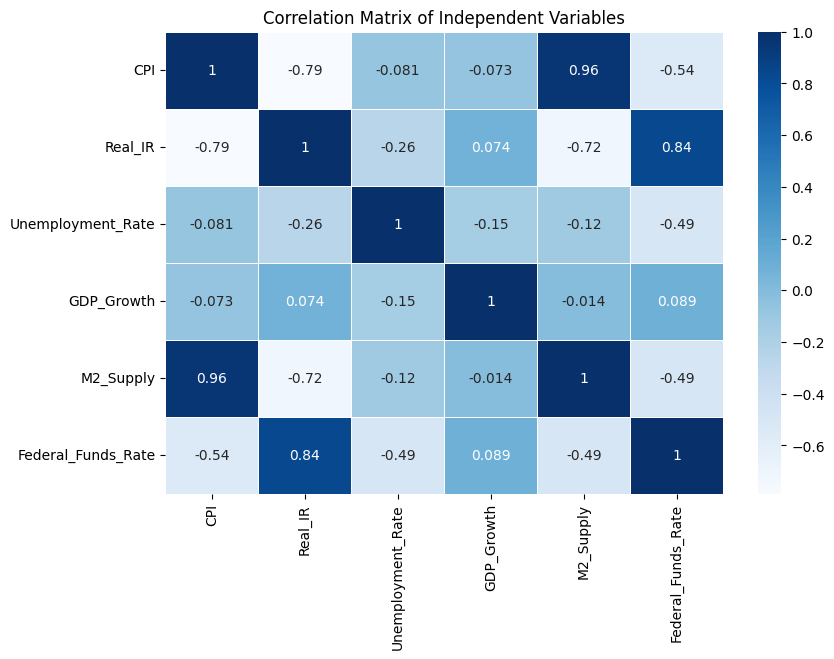

In [79]:
# correlation matrix to define colinearity

corr_matrix = data[['CPI', 'Real_IR', 'Unemployment_Rate', 'GDP_Growth', 'M2_Supply', 'Federal_Funds_Rate']].corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues', linewidths = 0.5)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

```bash
Based on the correlation matrix and p-value analysis for our reduced model we will be focusing on Unemployment Rate, GDP Growth, M2 Money Supply, and Federal Funds Rate. No variables that are included are highly correlated.
```

In [81]:
# Identifying dependent and independent variables for reduced model
independent_variables_reduced = ['Unemployment_Rate', 'GDP_Growth', 'M2_Supply', 'Federal_Funds_Rate']

x_reduced = data[independent_variables_reduced]
x_constant = sm.add_constant(x_reduced) # Adding a constant value of x

In [82]:
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_constant, y, test_size = .20, shuffle = False)

# Running OLS for reduced model
reduced_model = sm.OLS(y_train_reduced, x_train_reduced).fit()

# printing reduced model summary results
print("==============================================================================")
print("               Reduced Model Train Multiple Linear Regression"                   )
print("==============================================================================")
print(reduced_model.summary())

               Reduced Model Train Multiple Linear Regression
                            OLS Regression Results                            
Dep. Variable:                 NASDAQ   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     182.1
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           3.49e-44
Time:                        20:08:48   Log-Likelihood:                -766.48
No. Observations:                 102   AIC:                             1543.
Df Residuals:                      97   BIC:                             1556.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

```bash
Based on the reduced model, the R-Squared value is .882 which went down a little bit. However, only including statistically significant variables the reduced model of independent variables of Unemployment Rate, GDP Growth, M2 Money Supply, and Federal Funds Rate explains 88.2% of variation of Nasdaq. 

The coefficients for these variables remained relatively the same. All p-values of this model were statistically significant, so no need for a further reduced model.

Unemployment Rate (coefficient = -231.507): This negative relationship makes perfect sense using economic intution, unemployment increases during a recession which in turn is a negative impact on the stock market, decreasing Nasdaq. 

GDP Growth (coefficient = 52.950): This positive relationship is intuitive, stronger Gross Domestic Product signals a growing economy, which explains an increase in Nasdaq due to higher investor optimism and corporate earnings. 

M2 Money Supply (coeffiicent =  0.476): This positive relationship is intuitive, a stronger M2 implies higher liquidity in the US which ultimately leads to a an increase in Nasdaq. 

Federal Funds Rate (coefficient = 121.427): This positive sign is somewhat counterintuitive. Typically, higher rates restrict growth, but this may reflect periods where rate increases were paired with strong economic momentum, which suggests investor optimism during tightening cycles for tech specific stocks, ultimately increasing Nasdaq.
```

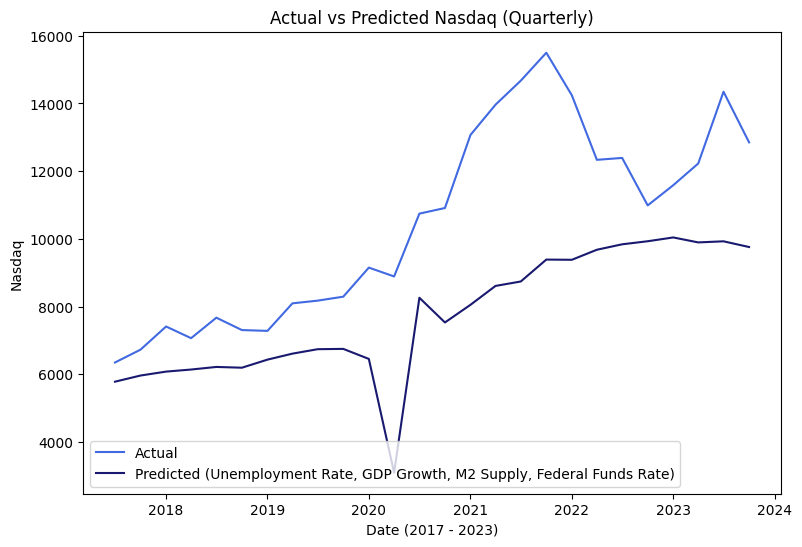

In [87]:
# Plotting our Actual versus our Reduced Model Predicted

y_pred_reduced = reduced_model.predict(x_test_reduced)
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
rmse_reduced = (mse_reduced) ** 0.5

data['Date'] = pd.to_datetime(data['Date']) # converting date to pandas datetime format
dates = data['Date'].iloc[x_test.index] # gets a datatype of all dates based on index

plt.figure(figsize = (9,6))
plt.plot(dates, y_test_reduced.values, label = 'Actual', color = 'royalblue')
plt.plot(dates, y_pred_reduced.values, label = 'Predicted (Unemployment Rate, GDP Growth, M2 Supply, Federal Funds Rate)', color = 'midnightblue')
plt.title('Actual vs Predicted Nasdaq (Quarterly)')
plt.xlabel('Date (2017 - 2023)')
plt.ylabel('Nasdaq')
plt.legend()
plt.show()

```bash


```

```bash
The model did a decent job at predicting the trend of Nasdaw but issues with magnititude as with the rest. There are smaller gaps between actual and predicted for nasdaq values. However, during 2020 there is a drop in predicted values during the 2020 pandemic, which ultimately makes sense because during COVID there was an increase in technology demand due to remote work and investor speculation, which are not captured in unemployment rate, gdp growth, m2 money supply, or federal funds rate so the diferences between 2020 and 2021 make sense. After 2021, there is a general trend upward of nasdaq predicted values, still with a gap, but underestimates the magnitude and the slight drop between 2022 and 2023.
```

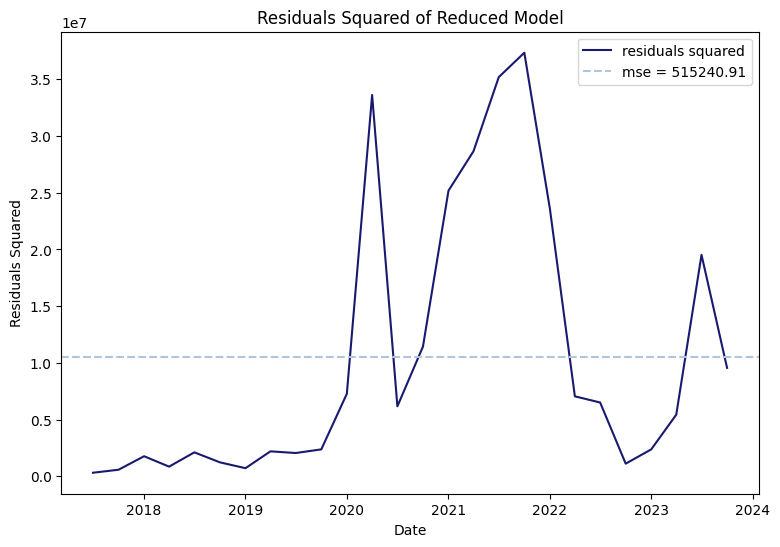

In [86]:
# Residual Squared Plot
y_test_series_reduced =  y_test.squeeze() # convert to series, to calculate residuals

residuals_squared_reduced = (y_test_series_reduced - y_pred_reduced) ** 2

plt.figure(figsize = (9,6))
plt.plot(dates, residuals_squared_reduced, color = 'midnightblue', label = 'residuals squared')
plt.axhline(mse_reduced, color = 'lightsteelblue', label = 'mse = 515240.91', linestyle = '--')
plt.xlabel('Date')
plt.ylabel('Residuals Squared')
plt.title('Residuals Squared of Reduced Model')
plt.legend()
plt.show()

```bash
From 2017-2019 the residuals squares are low and are under the mse line which means that these independent variables did a decent job at tracking nasdaq pre-covid. 

During 2020-2021 as explained above the model did a very poor job at grasping tech demand during this time, which makes nasdaq unique. 

From 2022-2023, the residuals squared go below the mse line and then slightly above. As market conditions stabalized our model was able to better explain nasdaq changes.
```